In [ ]:
import numpy as np
from scipy.optimize import minimize

In [341]:
from mpl_toolkits.mplot3d import Axes3D

In [304]:
class f_rosenbrock():

    def f(x):
        return ((1 - x[0])**2) + (100 * (x[1] - (x[0]**2))**2)

    def get_min():
        return f_rosenbrock.f([1, 100**2])

    def grad(x):
        grad = np.zeros_like(x)
        grad[0] = -2 * (1 - x[0]) - 4 * 100 * (x[1] - x[0]**2) * x[0]
        grad[1] = 2 * 100 * (x[1] - x[0]**2)
        return grad


class f_himmelblau():

    def f(x):
        return (x[0]**2 + x[1] - 11)**2 + (x[0] + x[1]**2 - 7)**2

    def get_min():
        return 0.0

    def grad(x):
        grad = np.zeros_like(x)
        grad[0] = 2 * (x[0]**2 + x[1] - 11) * (2 * x[0]) + 2 * (x[0] + x[1]**2 - 7)
        grad[1] = 2 * (x[0]**2 + x[1] - 11) + 2 * (x[0] + x[1] **2 - 7) * (2 * x[1])
        return grad

class f_spherical():

    def f(x):
        return np.sum(x**2, axis = 0)

    def get_min():
        return 0.0

    def grad(x):
        return 2 * x


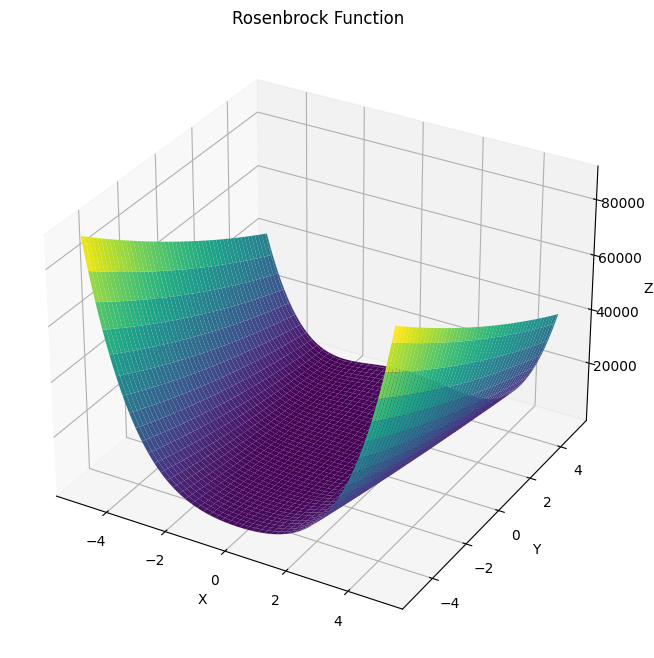

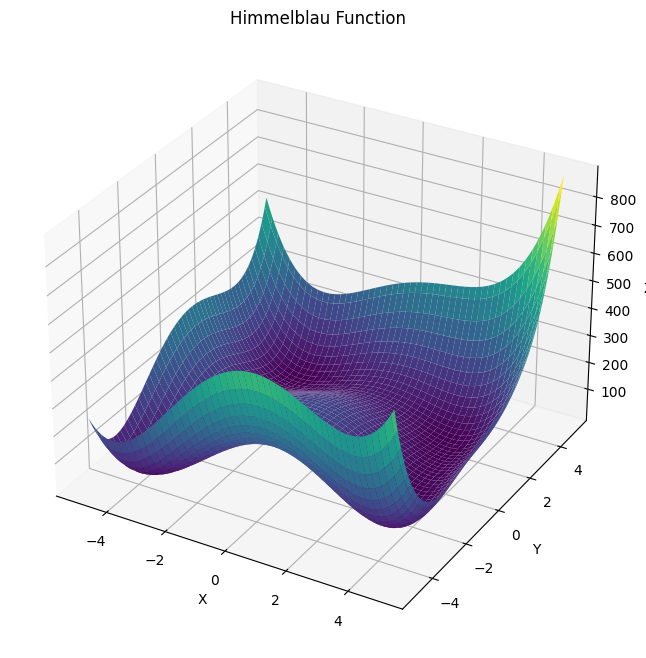

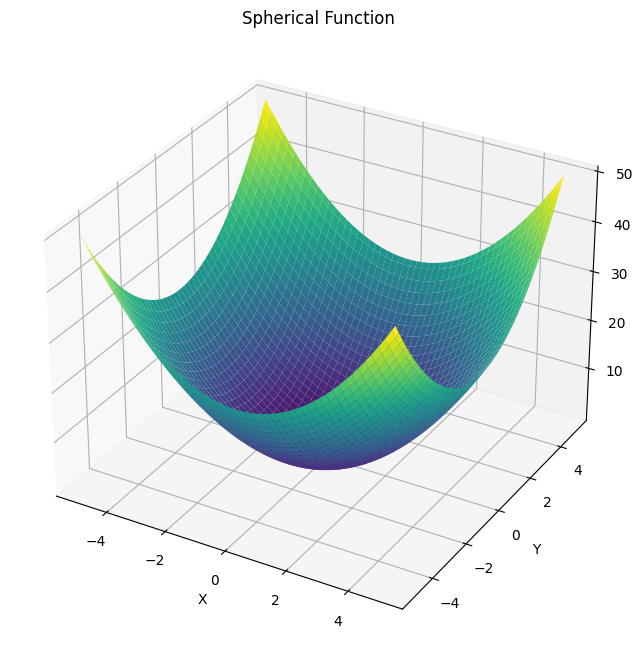

In [344]:
# Создание сетки точек для отображения функций
x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)
X, Y = np.meshgrid(x, y)

# Визуализация функции Rosenbrock
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, f_rosenbrock.f([X, Y]), cmap='viridis')
ax.set_title('Rosenbrock Function')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()

# Визуализация функции Himmelblau
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, f_himmelblau.f([X, Y]), cmap='viridis')
ax.set_title('Himmelblau Function')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()

# Визуализация функции Spherical
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, f_spherical.f(np.array([X, Y])), cmap='viridis')
ax.set_title('Spherical Function')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()

In [408]:
import numpy as np

def grad_step(f, lr_func, num_iter = 1000, curr_x = None, tol = 1e-18):

    if curr_x is None:
        curr_x = np.random.random(2)

    history = []

    for iter in range(0, num_iter):
        history.append(np.around(curr_x, 5))
        grad = f.grad(curr_x)
        lr = lr_func(f.f, curr_x, -grad)
        if np.linalg.norm(lr * grad) < tol:
            return iter, history, curr_x
        curr_x -= lr * grad

    return num_iter, history, np.array(curr_x)

def fixed_search(f, x, d, tol = None):
    return 0.001

def dichotomy_search(f, x, d, tol=1e-6):
    a, b = -1, 1

    while abs(b - a) > tol:
        c = (a + b) / 2
        x1, x2 = x + (c - tol) * d, x + (c + tol) * d
        f1, f2 = f(x1), f(x2)

        if f1 < f2:
            b = c
        else:
            a = c

    return (a + b) / 2

def golden_section_search(f, x, d, tol=1e-6):
    a, b = 0, 1
    rho = (np.sqrt(5) - 1) / 2

    while abs(b - a) > tol:
        x1 = a + (1 - rho) * (b - a)
        x2 = a + rho * (b - a)

        f1 = f(x + x1 * d)
        f2 = f(x + x2 * d)

        if f1 < f2:
            b = x2
        else:
            a = x1

    return (a + b) / 2

def Nelder_Mead_search(f, curr_x, num_iter = 1000):
    history = []
    def callback_func(x):
        history.append(np.around(x, 5))
    res = minimize(f.f, curr_x, method='Nelder-Mead', options={'disp': True, 'maxiter' : num_iter}, callback=callback_func)
    return res.nit, history, res.x


def grad_descent_2d(f, num_iter=1000, x0=None, type = "fixed", tol = 1e-6):

    x0 = x0 if x0 is not None else np.random.random(2)

    if type == "fixed":
        return grad_step(f, fixed_search, curr_x = x0, num_iter = num_iter, tol = tol)
    elif type == "golden_section":
        return grad_step(f, golden_section_search, curr_x = x0, num_iter = num_iter, tol = tol)
    elif type == "dichotomy":
        return grad_step(f, dichotomy_search, curr_x = x0, num_iter = num_iter, tol = tol)
    elif type == "Nelder-Mead":
        return Nelder_Mead_search(f, curr_x = x0, num_iter = num_iter)
    return None, None, None

In [409]:
import matplotlib.pyplot as plt

def grad_plot_2d(f, num_iter=1000, x0=np.array([0.03294912, 0.11885609]), type = "fixed", tol = 1e-8):

    history = []
    iter, history, curr_x = grad_descent_2d(f, num_iter, x0, type = type, tol = tol)
    history = np.array(history)
    x = np.linspace(-6, 6, 100)
    y = np.linspace(-6, 6, 100)
    X, Y = np.meshgrid(x, y)
    Z = f.f(np.array([X, Y]))
    fig, ax = plt.subplots(figsize=(8, 6))
    ax.contour(X, Y, Z, levels=np.logspace(0, 5, 35), cmap='jet')
    ax.plot(history[:, 0], history[:, 1], marker='o', color='red', markersize=3, label='Gradient Descent Path')
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_title('Gradient Descent: ' + type +", iterations: " + str(iter) + ", min: " + str(history[-1]) + " " + str(round(f.f(curr_x), 5)))
    ax.legend()
    #plt.show()

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 23
         Function evaluations: 47


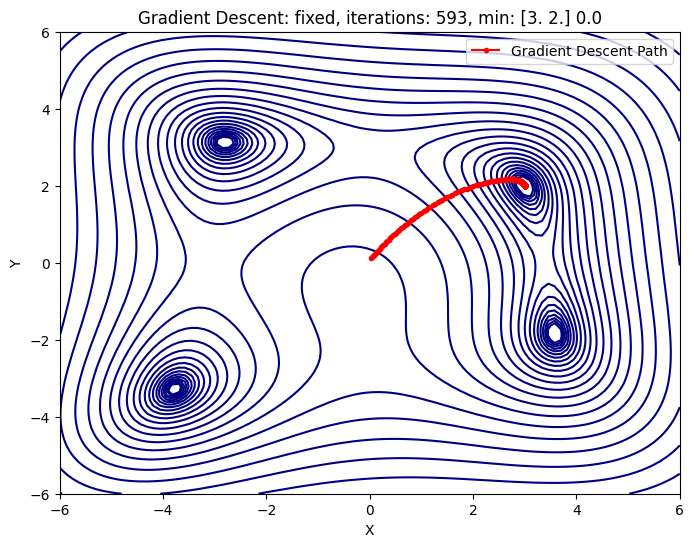

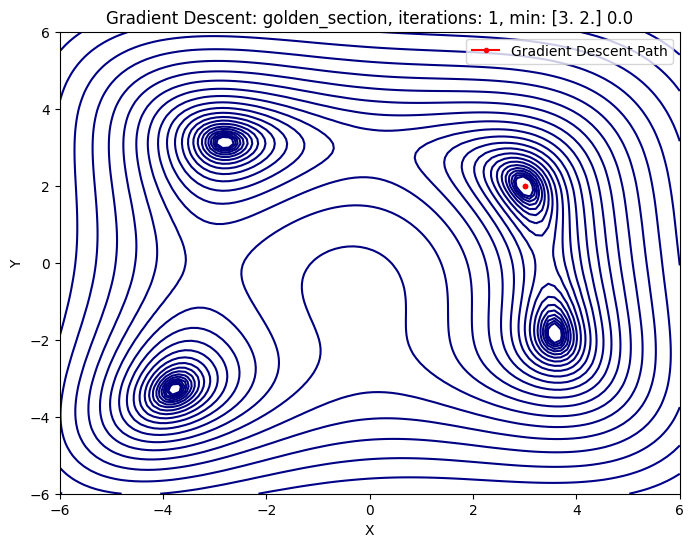

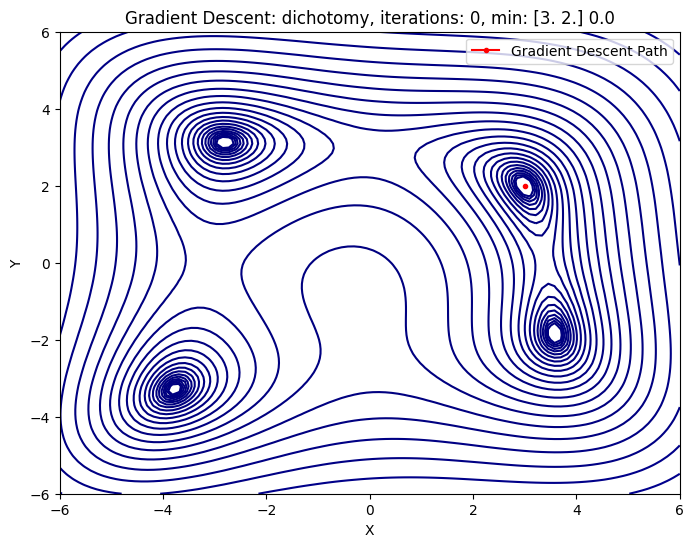

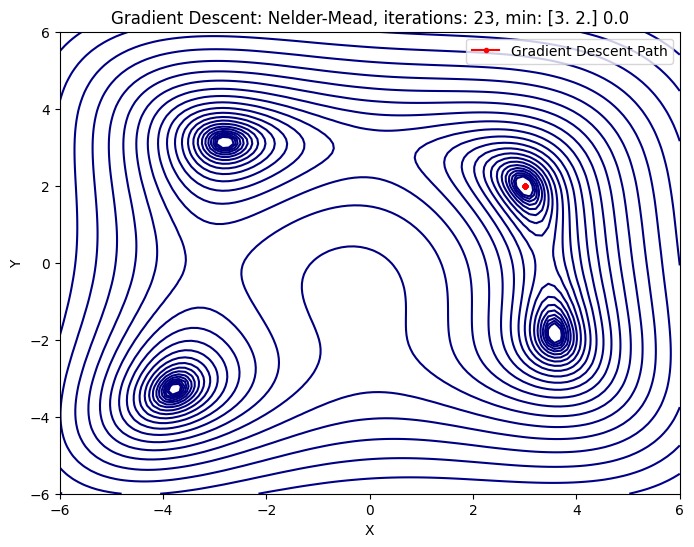

In [410]:
grad_plot_2d(f_himmelblau, type = "fixed")
grad_plot_2d(f_himmelblau, type = "golden_section")
grad_plot_2d(f_himmelblau, type = "dichotomy")
grad_plot_2d(f_himmelblau, type = "Nelder-Mead")

50 0.39133
176 0.05177
178 0.0522
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 65
         Function evaluations: 123
65 0.0


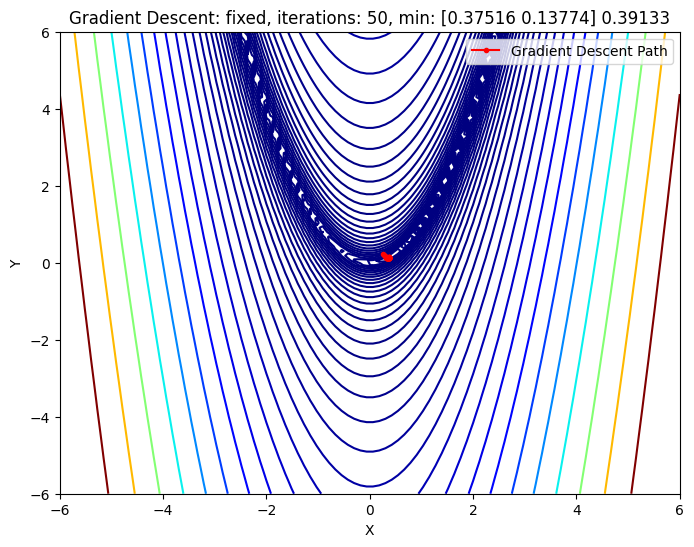

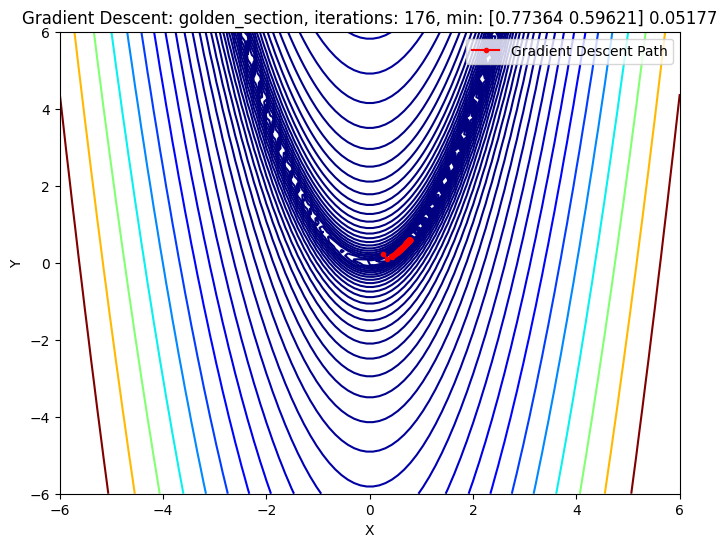

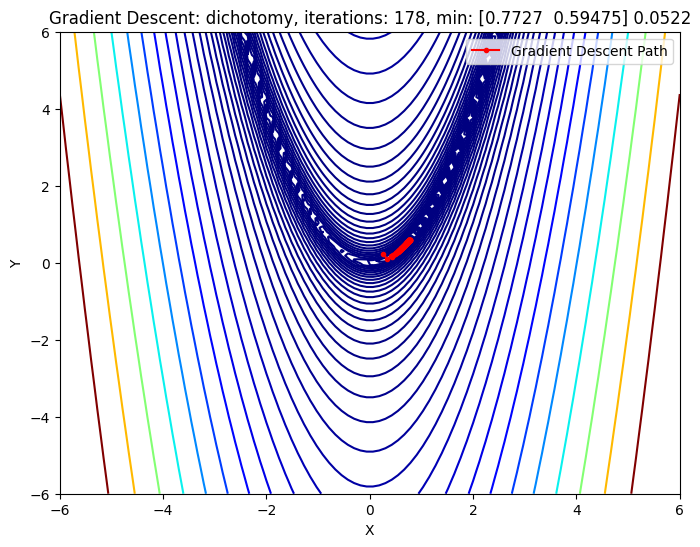

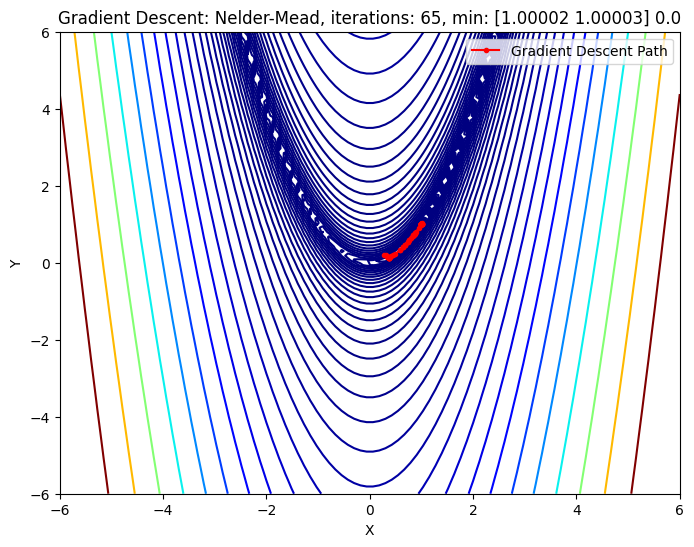

In [407]:
grad_plot_2d(f_rosenbrock, type = "fixed")
grad_plot_2d(f_rosenbrock, type = "golden_section")
grad_plot_2d(f_rosenbrock, type = "dichotomy")
grad_plot_2d(f_rosenbrock, type = "Nelder-Mead")

1000 0.00075
3 0.0
3 0.0
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 36
         Function evaluations: 69
36 0.0


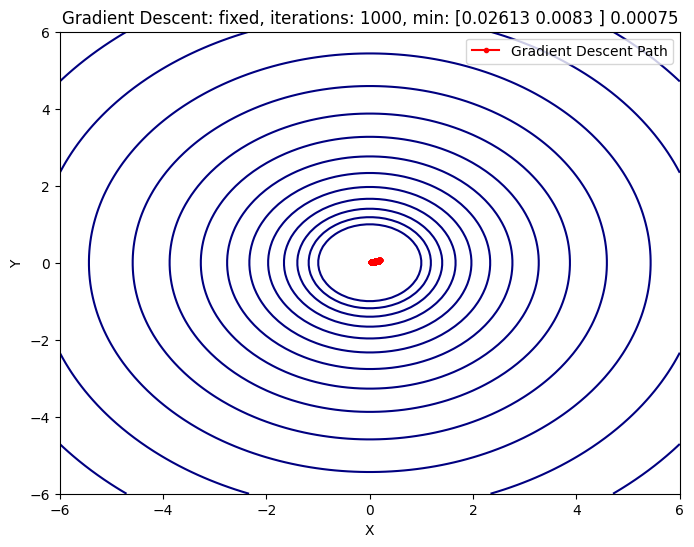

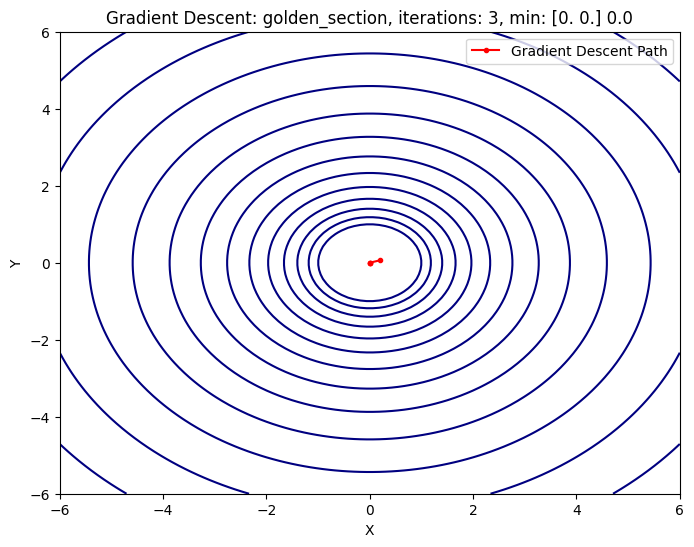

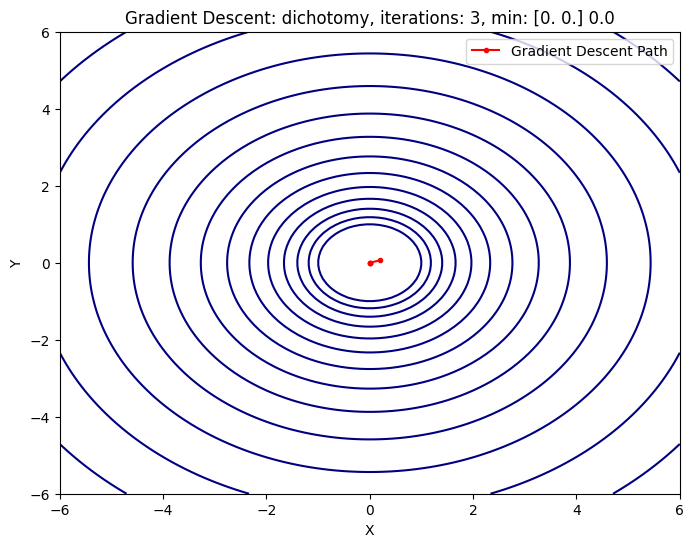

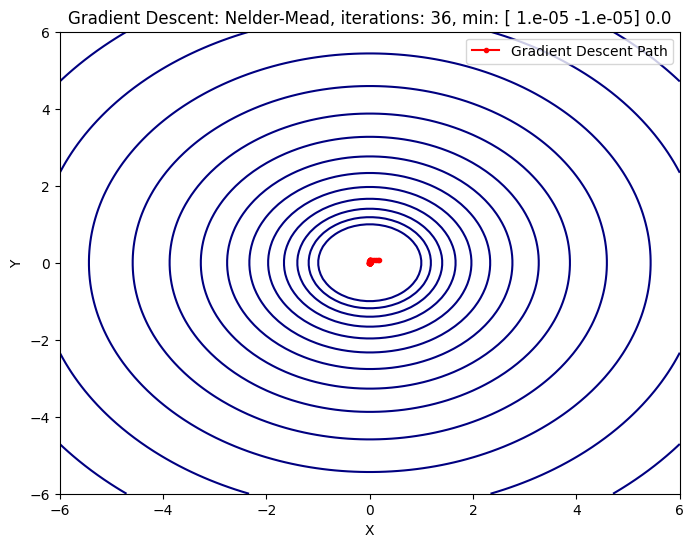

In [400]:
grad_plot_2d(f_spherical, type = "fixed")
grad_plot_2d(f_spherical, type = "golden_section")
grad_plot_2d(f_spherical, type = "dichotomy")
grad_plot_2d(f_spherical, type = "Nelder-Mead")